# Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Load Dataset

In [2]:
df = pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')
df.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# Descriptive Statistics

In [3]:
numerical_columns = ['year', 'condition', 'odometer', 'sellingprice']
categorical_columns = ['make', 'model', 'body', 'transmission', 'color']

print("Descriptive Statistics:")
print(df[numerical_columns].describe())
print("\nCategorical Statistics:")
print(df[categorical_columns].describe())

Descriptive Statistics:
                year      condition       odometer   sellingprice
count  558837.000000  547017.000000  558743.000000  558825.000000
mean     2010.038927      30.672365   68320.017767   13611.358810
std         3.966864      13.402832   53398.542821    9749.501628
min      1982.000000       1.000000       1.000000       1.000000
25%      2007.000000      23.000000   28371.000000    6900.000000
50%      2012.000000      35.000000   52254.000000   12100.000000
75%      2013.000000      42.000000   99109.000000   18200.000000
max      2015.000000      49.000000  999999.000000  230000.000000

Categorical Statistics:
          make   model    body transmission   color
count   548536  548438  545642       493485  558088
unique      96     973      87            4      46
top       Ford  Altima   Sedan    automatic   black
freq     93554   19349  199437       475915  110970


In [4]:
# Market Trends and Preferences
# Identify the most popular makes, models, and body types
top_makes = df['make'].value_counts().head(5)
top_models = df['model'].value_counts().head(5)
top_body_types = df['body'].value_counts().head(5)

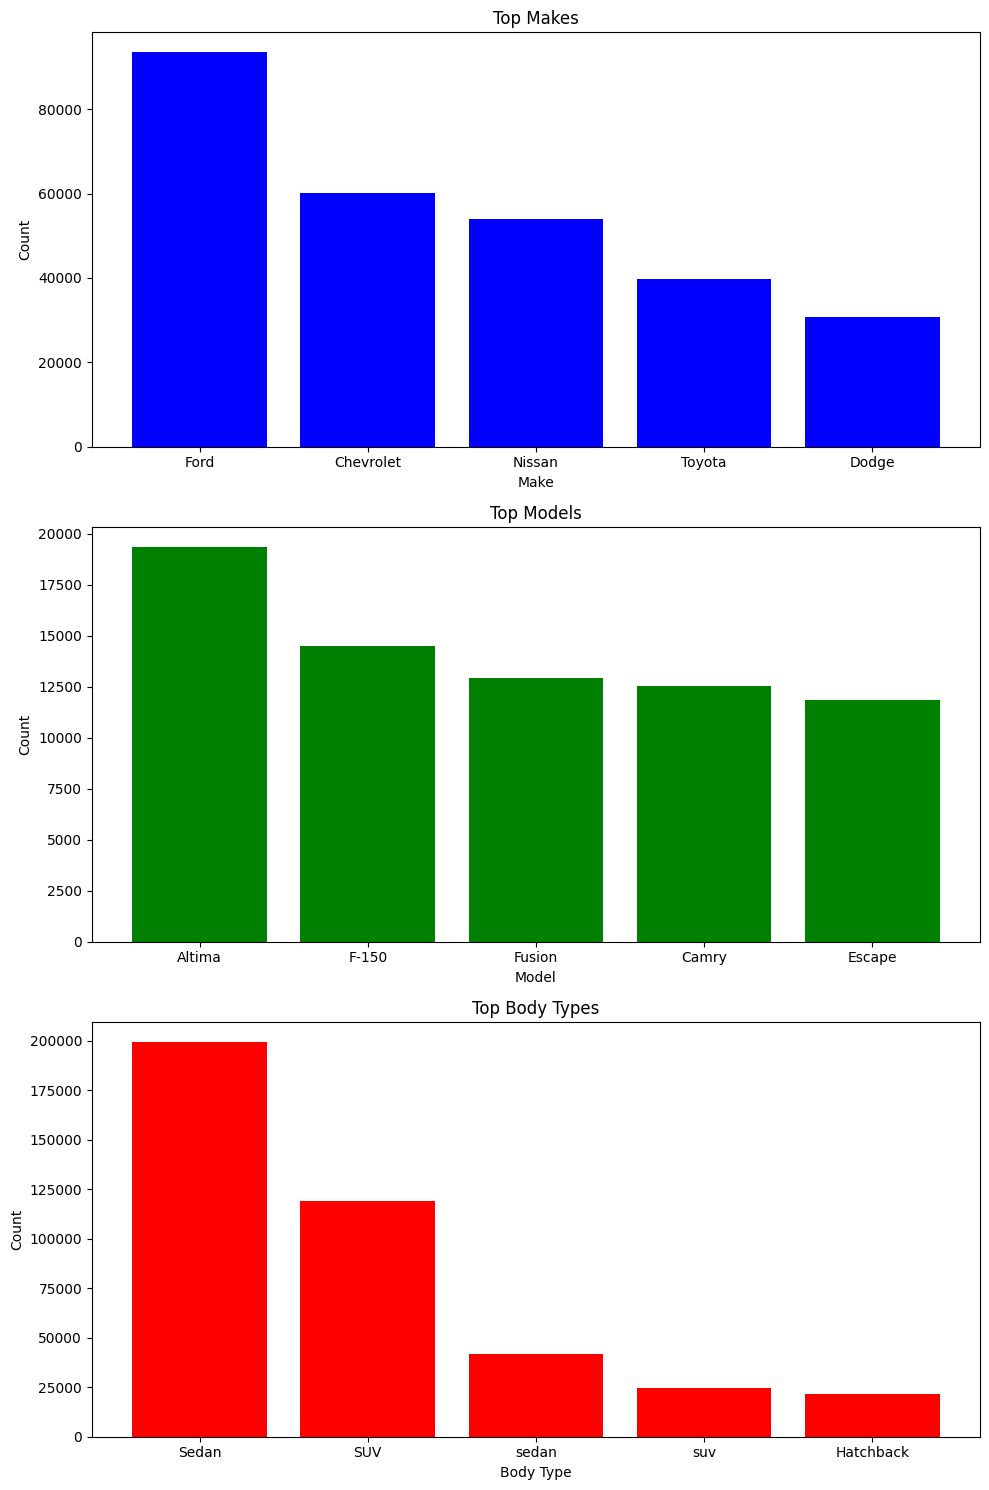

In [5]:
# Plotting the bar charts
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Top Makes
axes[0].bar(top_makes.index, top_makes.values, color='blue')
axes[0].set_title('Top Makes')
axes[0].set_xlabel('Make')
axes[0].set_ylabel('Count')

# Top Models
axes[1].bar(top_models.index, top_models.values, color='green')
axes[1].set_title('Top Models')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Count')

# Top Body Types
axes[2].bar(top_body_types.index, top_body_types.values, color='red')
axes[2].set_title('Top Body Types')
axes[2].set_xlabel('Body Type')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [6]:
# Analyze color preferences across different regions or states
color_by_state = df.groupby('state')['color'].value_counts().unstack()

# Explore average condition and odometer readings
average_condition = df.groupby('make')['condition'].mean()
average_odometer = df.groupby('make')['odometer'].mean()

print(average_condition)
print("ODOMETER")
print(average_odometer)

make
Acura           29.855151
Aston Martin    35.920000
Audi            31.551796
BMW             33.339915
Bentley         34.252174
                  ...    
subaru          20.738095
suzuki          32.333333
toyota          24.551282
volkswagen      27.312500
vw              28.666667
Name: condition, Length: 96, dtype: float64
ODOMETER
make
Acura            85829.219285
Aston Martin     26603.640000
Audi             66039.752386
BMW              64297.520660
Bentley          39239.698276
                    ...      
subaru          134812.600000
suzuki           80901.400000
toyota          145414.336842
volkswagen      103235.083333
vw               67813.583333
Name: odometer, Length: 96, dtype: float64


# Exploratory Data Analysis (EDA)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

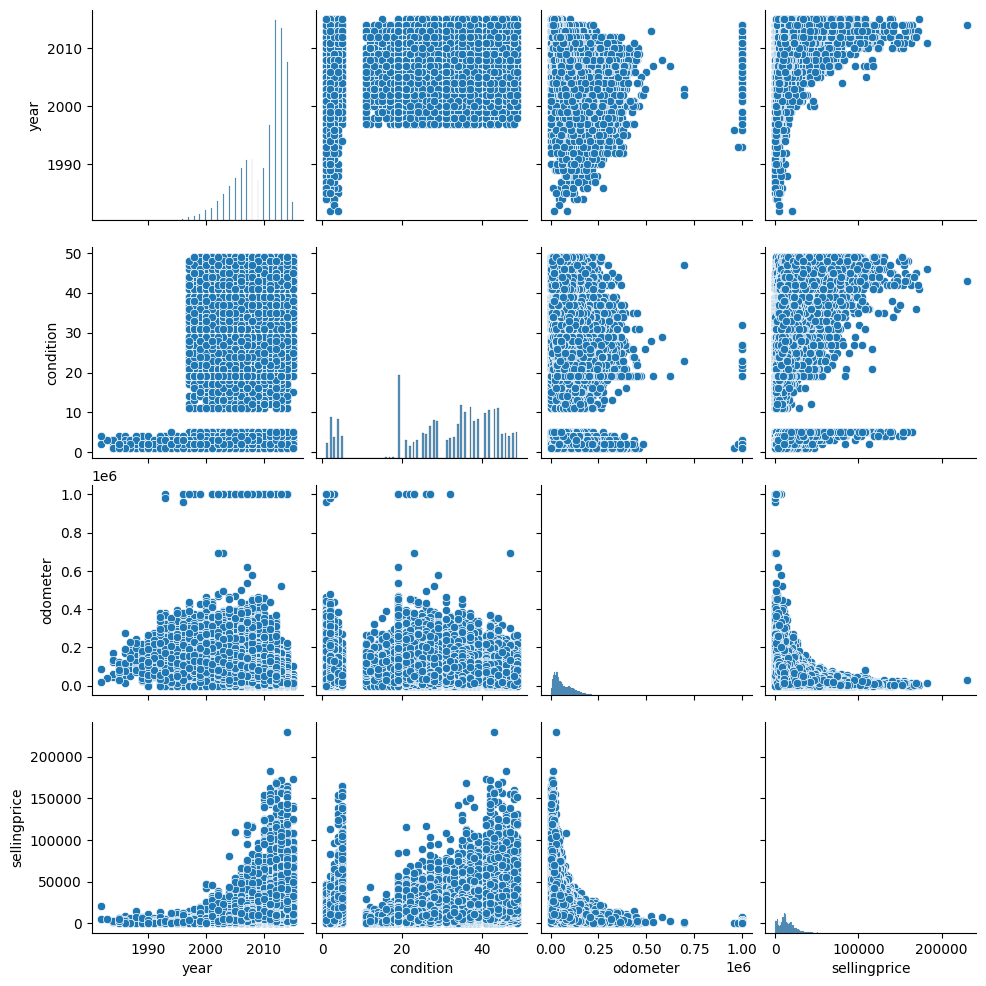

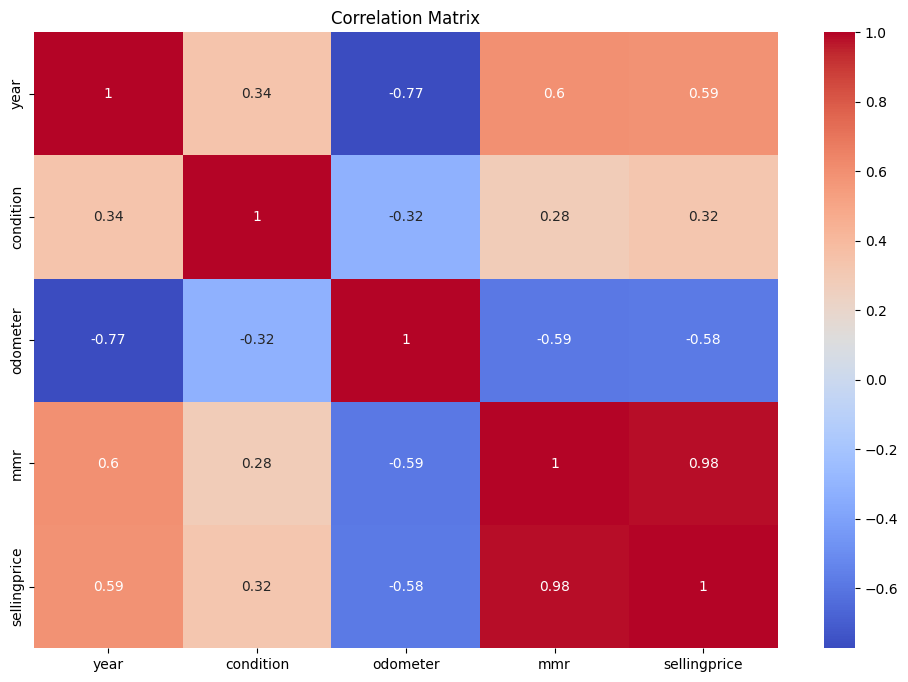

In [7]:
sns.pairplot(df[numerical_columns])
plt.show()

# Visualize relationships and trends
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Data Cleaning
# Handle missing values
df.dropna(subset=['year', 'condition', 'odometer', 'sellingprice'], inplace=True)

In [9]:
# Feature selection
X = df[['year', 'condition', 'odometer']]
y = df['sellingprice']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 57774301.83325654
